In [1]:
# Importing in Common Data Science Libraries
import pandas as pd
import numpy as np
import math
from sklearn.feature_selection import VarianceThreshold

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import r2_score

### Reading Dataset

In [2]:
data = pd.read_csv(r'H2HBABBA2570.csv')

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR foundation,2019-12-17 00:00:00,2019.0,1.930220e+09,2019-12-06,20191205,20191206,20191221.0,USD,RV,1.0,NaN,16508.55,20191206.0,NAH4,1.930220e+09,0
1,U001,0200780383,MEIJ llc,2020-02-28 00:00:00,2020.0,1.930512e+09,2020-02-11,20200211,20200211,20200226.0,USD,RV,1.0,NaN,49294.01,20200211.0,NAA8,1.930512e+09,0
2,U001,200769623,WAL-MAR,NaN,2020.0,1.930881e+09,2020-05-09,20200508,20200509,20200524.0,USD,RV,1.0,NaN,2851.12,20200509.0,NAH4,1.930881e+09,1
3,U001,0200148860,DOLLA foundation,NaN,2020.0,1.930724e+09,2020-04-02,20200331,20200402,20200417.0,USD,RV,1.0,NaN,13529.55,20200402.0,NAA8,1.930724e+09,1
4,U001,0200762301,C&S WH in,2019-01-23 00:00:00,2019.0,1.928578e+09,2019-01-07,20190105,20190107,20190122.0,USD,RV,1.0,NaN,4443.64,20190107.0,NAC6,1.928578e+09,0


## Removing data having NaN values and assigning it to testing data set 


In [4]:
# Spliting the given data in train and test
var  = data["clear_date"].isnull()
print(np.unique(var,return_counts=True))
test = data[var]
test = test.reset_index(drop=True)
test
train = data[~var]
train = train.reset_index(drop=True)
train

(array([False,  True]), array([40000, 10000], dtype=int64))


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR foundation,2019-12-17 00:00:00,2019.0,1.930220e+09,2019-12-06,20191205,20191206,20191221.0,USD,RV,1.0,NaN,16508.55,20191206.0,NAH4,1.930220e+09,0
1,U001,0200780383,MEIJ llc,2020-02-28 00:00:00,2020.0,1.930512e+09,2020-02-11,20200211,20200211,20200226.0,USD,RV,1.0,NaN,49294.01,20200211.0,NAA8,1.930512e+09,0
2,U001,0200762301,C&S WH in,2019-01-23 00:00:00,2019.0,1.928578e+09,2019-01-07,20190105,20190107,20190122.0,USD,RV,1.0,NaN,4443.64,20190107.0,NAC6,1.928578e+09,0
3,CA02,0140104440,SO systems,2019-06-20 00:00:00,2019.0,2.960554e+09,2019-06-06,20190606,20190606,20190617.0,CAD,RV,1.0,NaN,233272.42,20190607.0,CA10,2.960554e+09,0
4,U001,0200416837,DEC systems,2019-07-01 00:00:00,2019.0,1.929515e+09,2019-06-19,20190619,20190619,20190709.0,USD,RV,1.0,NaN,412.08,20190616.0,NAM4,1.929515e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,0200705742,DOT corporation,2019-07-22 00:00:00,2019.0,1.929578e+09,2019-07-05,20190705,20190705,20190808.0,USD,RV,1.0,NaN,3607.05,20190705.0,NAAW,1.929578e+09,0
39996,U001,0200769623,WAL-MAR corporation,2019-06-10 00:00:00,2019.0,1.929395e+09,2019-05-30,20190529,20190530,20190614.0,USD,RV,1.0,NaN,7255.32,20190530.0,NAH4,1.929395e+09,0
39997,U001,0200749225,SUPER in,2019-12-20 00:00:00,2019.0,1.930216e+09,2019-12-05,20191204,20191205,20191220.0,USD,RV,1.0,NaN,44276.86,20191205.0,NAA8,1.930216e+09,0
39998,U001,0200762301,C&S WH associates,2019-05-31 00:00:00,2019.0,1.929028e+09,2019-03-27,20190326,20190327,20190531.0,USD,RV,1.0,NaN,5012.06,20190327.0,NAGD,1.929028e+09,0


## Preprocessing  the data


#### Checking for constant columns and duplicates if any 

In [5]:
# checking for constant columns 
constant_cols = [_ for _ in train.columns if train[_].nunique()<= 1]
print(constant_cols)
print(train[constant_cols])

# eleminating the constant columns
train.drop(columns=constant_cols,inplace=True)
print(train.info())

['posting_id', 'area_business', 'isOpen']
       posting_id  area_business  isOpen
0             1.0            NaN       0
1             1.0            NaN       0
2             1.0            NaN       0
3             1.0            NaN       0
4             1.0            NaN       0
...           ...            ...     ...
39995         1.0            NaN       0
39996         1.0            NaN       0
39997         1.0            NaN       0
39998         1.0            NaN       0
39999         1.0            NaN       0

[40000 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           40000 non-null  object 
 1   cust_number             40000 non-null  object 
 2   name_customer           40000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness

In [6]:
# checking for duplicate columns 
train_transpose = train.T
train_transpose.drop_duplicates(keep="first")

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
business_code,U001,U001,U001,CA02,U001,U001,CA02,U001,U001,U001,...,U001,U001,U001,U001,U013,U001,U001,U001,U001,U001
cust_number,0200769623,0200780383,0200762301,0140104440,0200416837,0200794332,0140104429,200794332,0200769623,0200769623,...,0200748335,0200769623,0200750051,0200759878,0100009932,0200705742,0200769623,0200749225,0200762301,0200777735
name_customer,WAL-MAR foundation,MEIJ llc,C&S WH in,SO systems,DEC systems,COST in,COSTCO llc,COST co,WAL-MAR us,WAL-MAR in,...,FO corp,WAL-MAR,ALBER systems,SA,SYSCO IN,DOT corporation,WAL-MAR corporation,SUPER in,C&S WH associates,NASH
clear_date,2019-12-17 00:00:00,2020-02-28 00:00:00,2019-01-23 00:00:00,2019-06-20 00:00:00,2019-07-01 00:00:00,2019-08-13 00:00:00,2019-10-31 00:00:00,2019-08-26 00:00:00,2019-03-27 00:00:00,2019-08-27 00:00:00,...,2019-08-10 00:00:00,2019-11-12 00:00:00,2019-09-23 00:00:00,2019-11-25 00:00:00,2019-03-13 00:00:00,2019-07-22 00:00:00,2019-06-10 00:00:00,2019-12-20 00:00:00,2019-05-31 00:00:00,2019-02-01 00:00:00
buisness_year,2019.0,2020.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,...,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0,2019.0
doc_id,1930220453.0,1930512438.0,1928578243.0,2960553503.0,1929514951.0,1929662057.0,2960585765.0,1929723721.0,1928979202.0,1929752978.0,...,1929655492.0,1930051898.0,1929837600.0,1930022079.0,1991822328.0,1929578251.0,1929395416.0,1930215705.0,1929028348.0,1928644431.0
posting_date,2019-12-06,2020-02-11,2019-01-07,2019-06-06,2019-06-19,2019-07-29,2019-10-11,2019-08-09,2019-03-17,2019-08-16,...,2019-07-24,2019-10-25,2019-09-06,2019-10-19,2019-02-09,2019-07-05,2019-05-30,2019-12-05,2019-03-27,2019-01-17
document_create_date,20191205,20200211,20190105,20190606,20190619,20190726,20191011,20190808,20190316,20190816,...,20190724,20191025,20190906,20191019,20190206,20190705,20190529,20191204,20190326,20190118
document_create_date.1,20191206,20200211,20190107,20190606,20190619,20190729,20191011,20190809,20190317,20190816,...,20190724,20191025,20190906,20191019,20190209,20190705,20190530,20191205,20190327,20190117
due_in_date,20191221.0,20200226.0,20190122.0,20190617.0,20190709.0,20190813.0,20191025.0,20190824.0,20190401.0,20190831.0,...,20190813.0,20191109.0,20190921.0,20191203.0,20190311.0,20190808.0,20190614.0,20191220.0,20190531.0,20190201.0


In [7]:
## checking further for duplicates column
# invoice_id = Unique number assigned when a seller creates an Invoice.
# doc_id = It is also an unique identifier of an invoice is a primary key for acct_doc_header table
# since both columns means similar thus checking if it is duplicate or not

compare = np.array(np.where(train["invoice_id"] == train["doc_id"] , True, False))
print(np.unique(compare,return_counts=True))
print(train.invoice_id.isnull().sum())



(array([False,  True]), array([    5, 39995], dtype=int64))
5


#### By this we can say that invoice_id  is duplicate of doc_id
###### And dropping both since id dont impart any information to model 

In [8]:
# thus invoice_id is duplicate of doc_id, hence droping
train.drop(columns=["invoice_id","doc_id"],axis="columns",inplace = True)

In [9]:
# checking for duplicate rows 
train.duplicated().sum()
train = train.drop_duplicates(keep='first')

#### Converting the data type 

In [10]:
train = train.astype({"buisness_year" :"int64"})
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39137 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           39137 non-null  object 
 1   cust_number             39137 non-null  object 
 2   name_customer           39137 non-null  object 
 3   clear_date              39137 non-null  object 
 4   buisness_year           39137 non-null  int64  
 5   posting_date            39137 non-null  object 
 6   document_create_date    39137 non-null  int64  
 7   document_create_date.1  39137 non-null  int64  
 8   due_in_date             39137 non-null  float64
 9   invoice_currency        39137 non-null  object 
 10  document type           39137 non-null  object 
 11  total_open_amount       39137 non-null  float64
 12  baseline_create_date    39137 non-null  float64
 13  cust_payment_terms      39137 non-null  object 
dtypes: float64(3), int64(3), object(8)
mem

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR foundation,2019-12-17 00:00:00,2019,2019-12-06,20191205,20191206,20191221.0,USD,RV,16508.55,20191206.0,NAH4
1,U001,0200780383,MEIJ llc,2020-02-28 00:00:00,2020,2020-02-11,20200211,20200211,20200226.0,USD,RV,49294.01,20200211.0,NAA8
2,U001,0200762301,C&S WH in,2019-01-23 00:00:00,2019,2019-01-07,20190105,20190107,20190122.0,USD,RV,4443.64,20190107.0,NAC6
3,CA02,0140104440,SO systems,2019-06-20 00:00:00,2019,2019-06-06,20190606,20190606,20190617.0,CAD,RV,233272.42,20190607.0,CA10
4,U001,0200416837,DEC systems,2019-07-01 00:00:00,2019,2019-06-19,20190619,20190619,20190709.0,USD,RV,412.08,20190616.0,NAM4


In [11]:
train["document_create_date"]= pd.to_datetime(train["document_create_date"], format='%Y%m%d')
train["baseline_create_date"]= pd.to_datetime(train["baseline_create_date"], format='%Y%m%d')
train["document_create_date.1"]= pd.to_datetime(train["document_create_date.1"], format='%Y%m%d')
train["due_in_date"]= pd.to_datetime(train["due_in_date"],format='%Y%m%d')
train["posting_date"]= train["posting_date"].str.replace("-","").astype("int")
train["posting_date"] = pd.to_datetime(train["posting_date"],format='%Y%m%d')
train["clear_date"] = pd.to_datetime(train["clear_date"])
train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR foundation,2019-12-17,2019,2019-12-06,2019-12-05,2019-12-06,2019-12-21,USD,RV,16508.55,2019-12-06,NAH4
1,U001,0200780383,MEIJ llc,2020-02-28,2020,2020-02-11,2020-02-11,2020-02-11,2020-02-26,USD,RV,49294.01,2020-02-11,NAA8
2,U001,0200762301,C&S WH in,2019-01-23,2019,2019-01-07,2019-01-05,2019-01-07,2019-01-22,USD,RV,4443.64,2019-01-07,NAC6
3,CA02,0140104440,SO systems,2019-06-20,2019,2019-06-06,2019-06-06,2019-06-06,2019-06-17,CAD,RV,233272.42,2019-06-07,CA10
4,U001,0200416837,DEC systems,2019-07-01,2019,2019-06-19,2019-06-19,2019-06-19,2019-07-09,USD,RV,412.08,2019-06-16,NAM4


In [12]:
# unique value counts to check if any groupping is required, and sufficient info is provided through data
# and also checking for categorial values 
for c in train.columns:
    if train[c].nunique() <= 15:
        print(train[c].value_counts())
        print("#"*50)

U001    35429
CA02     3041
U013      533
U002      121
U005       11
U007        2
Name: business_code, dtype: int64
##################################################
2019    33975
2020     5162
Name: buisness_year, dtype: int64
##################################################
USD    36095
CAD     3042
Name: invoice_currency, dtype: int64
##################################################
RV    39132
X2        5
Name: document type, dtype: int64
##################################################


## Creating Target column

In [13]:
# creating target variable b4 spliting
train["delay"] = (train["clear_date"] - train["due_in_date"]).apply(lambda x: x.days)
train["delay"]


0        -4
1         2
2         1
3         3
4        -8
         ..
39995   -17
39996    -4
39997     0
39998     0
39999     0
Name: delay, Length: 39137, dtype: int64

## Sorting data based on posting date

In [14]:
# sorting data based on posting date
train["posting_date"].min(),train["posting_date"].max()

(Timestamp('2018-12-30 00:00:00'), Timestamp('2020-02-27 00:00:00'))

In [15]:
train.sort_values(by=["posting_date"],inplace=True)
train


,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,delay
39360,U001,0200726979,BJ'S in,2019-01-15,2019,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,307.37,2018-12-30,NAA8,1
25027,U001,0200759878,SA foundation,2019-01-15,2019,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,50099.14,2018-12-30,NAH4,1
39674,U013,0100024077,GLOBAL us,2019-02-14,2019,2018-12-30,2018-12-26,2018-12-30,2019-02-13,USD,RV,11734.73,2018-12-30,NAVF,1
18576,U001,0200744019,TARG co,2019-01-11,2019,2018-12-30,2018-12-31,2018-12-30,2019-01-14,USD,RV,8156.46,2018-12-30,NAA8,-3
8802,U001,0200769623,WAL-MAR systems,2019-01-10,2019,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,42630.58,2018-12-30,NAH4,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18370,U001,0200769623,WAL-MAR llc,2020-03-09,2020,2020-02-26,2020-02-26,2020-02-26,2020-03-12,USD,RV,1748.38,2020-02-26,NAH4,-3
26252,U001,0200769623,WAL-MAR trust,2020-03-09,2020,2020-02-26,2020-02-25,2020-02-26,2020-03-12,USD,RV,4809.62,2020-02-26,NAH4,-3
895,U001,0200718130,SYSCO F trust,2020-04-03,2020,2020-02-26,2020-02-26,2020-02-26,2020-03-29,USD,RV,23787.10,2020-02-26,NA32,5
8905,U001,0100031704,DELHAIZE us,2020-03-17,2020,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,109024.52,2020-02-27,NAA8,4


## Droping some columns thus they dont provide info related to delay  to the model

In [16]:
train = train.drop(columns=["document_create_date.1","cust_number","document type", "document_create_date", "baseline_create_date"],axis=1)

# Spliting Train further for creating new val and test for testing model

In [17]:
# since data is focused on predicting date 
# spliting will be done on the basis of posting date 
train["posting_year"] = train["posting_date"].dt.year
train["posting_month"] = train["posting_date"].dt.month
train.nunique()
# 3 distict value in posting year
# splitng data year wise to get the record per month in all three year

business_code             6
name_customer          3912
clear_date              397
buisness_year             2
posting_date            421
due_in_date             492
invoice_currency          2
total_open_amount     35513
cust_payment_terms       68
delay                   182
posting_year              3
posting_month            12
dtype: int64

#### Spliting data quaterly for uniform record distriution

In [18]:
train_2018 = train[train["posting_year"] == 2018]
train_2019 = train[train["posting_year"] == 2019]
train_2020 = train[train["posting_year"] == 2020]

In [19]:
month_2018, count_2018  = np.unique(train_2018.posting_month,return_counts = True)
count_2018
# means only 1 month from 2018 with 138 records 

array([138], dtype=int64)

In [20]:
month_2019, count_2019  = np.unique(train_2019.posting_month,return_counts = True)
count_2019

array([2670, 2687, 3078, 3064, 3108, 3127, 2945, 2996, 2821, 3029, 2739,
       1738], dtype=int64)

In [21]:
month_2020, count_2020 = np.unique(train_2020.posting_month,return_counts = True)
count_2020

array([2653, 2344], dtype=int64)

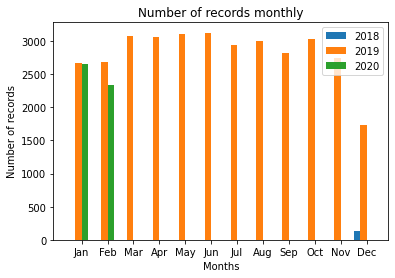

In [22]:
fig = plt.figure()
plt.title('Number of records monthly')
plt.ylabel('Number of records')
plt.xlabel('Months')
n=12
r = np.arange(n)
width = 0.25
plt.xticks(r + width/2,['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'])
z = [0,0,0,0,0,0,0,0,0,0,0,0]
for m in range(len(month_2018)) :
    z[month_2018[m]-1] = count_2018[m]
plt.bar(r - width, z, label = '2018',width = width)  

plt.bar(r , count_2019, label = '2019',width = width)

z = [0,0,0,0,0,0,0,0,0,0,0,0]
for m in range(len(month_2020)) :
    z[month_2020[m]-1] = count_2020[m]
plt.bar(r + width, z, label = '2020',width = width)
plt.legend()
plt.show()

#### after visualizing  the monthly number of record trend in graph 
#### we can come to the conclusion  that
- Jan-2019 to Aug-2019 -> main training set
- Sep-2019 to Nov-2019 -> validating set
- Dec-2019 to Feb-2020 -> testing set

In [23]:
# seleting_train = (train["posting_month"] < 9 & train["posting_year"] == 2019) | (train["posting_month"] == 12 & train["posting_year"] == 2018) 
main_train = pd.DataFrame(train[(train["posting_year"] != 2020)])
main_train = pd.DataFrame(main_train[(main_train["posting_month"] < 9)])
val = pd.DataFrame(train[(train["posting_year"] != 2020)])
val = pd.DataFrame(val[(val["posting_year"] != 2018)])
val = pd.DataFrame(val[(val["posting_month"] > 8)])
val = pd.DataFrame(val[(val["posting_month"] < 12)])
last_month_2019 = pd.DataFrame(train_2019[(train_2019["posting_month"] == 12)])
testing = last_month_2019.append(train_2020)
print("Min Max value of main_train:" ,main_train.posting_date.min(),main_train.posting_date.max(),main_train.shape)
print("Min Max value of val:" ,val.posting_date.min(),val.posting_date.max(),val.shape)
print("Min Max value of testing:" ,testing.posting_date.min(),testing.posting_date.max(),testing.shape)

Min Max value of main_train: 2019-01-01 00:00:00 2019-08-31 00:00:00 (23675, 12)
Min Max value of val: 2019-09-01 00:00:00 2019-11-30 00:00:00 (8589, 12)
Min Max value of testing: 2019-12-01 00:00:00 2020-02-27 00:00:00 (6735, 12)


## Seprating target column from training set 

In [24]:
testing.posting_date.min(),testing.posting_date.max()

(Timestamp('2019-12-01 00:00:00'), Timestamp('2020-02-27 00:00:00'))

In [25]:
main_train.posting_date.min(),main_train.posting_date.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

In [26]:
main_train_x = main_train.drop(columns="delay",axis=1)
main_train_y = main_train.delay
val_x = val.drop(columns="delay",axis=1)
val_y = val.delay
testing_x = testing.drop(columns="delay",axis=1)
testing_y = testing.delay
print(main_train_x.nunique())
print("##"*50)
print(val_x.nunique())
print("##"*50)
print(testing_x.nunique())
print("##"*50)


business_code             6
name_customer          3117
clear_date              262
buisness_year             1
posting_date            243
due_in_date             316
invoice_currency          2
total_open_amount     21728
cust_payment_terms       59
posting_year              1
posting_month             8
dtype: int64
####################################################################################################
business_code            4
name_customer         1901
clear_date              94
buisness_year            1
posting_date            91
due_in_date            132
invoice_currency         2
total_open_amount     8100
cust_payment_terms      49
posting_year             1
posting_month            3
dtype: int64
####################################################################################################
business_code            5
name_customer         1599
clear_date             120
buisness_year            2
posting_date            85
due_in_date            152
invoi

# EDA

In [27]:
main_train_y.describe()
main_train_y.min(),main_train_y.max(),main_train_y.mean()

(-80, 277, 1.1103273495248152)

c:\users\hrishikesh thakur\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

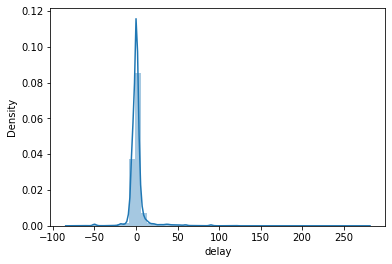

In [28]:
sns.distplot (main_train_y)

## Detecting and Removing outlier

In [29]:
main_train_x = main_train_x.merge(main_train_y,on = main_train_x.index)
Q1 = np.percentile(main_train_x['delay'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(main_train_x['delay'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 
IQR, Q3 ,Q1

(5.0, 2.0, -3.0)

In [30]:
upper = Q3 +1.5*IQR

lower = Q1 - 1.5*IQR
upper,lower

(9.5, -10.5)

In [31]:
# main_train_x = main_train_x[((main_train_y<lower)&(main_train_y>upper))]
main_train_x =  main_train_x[(main_train_x["delay"]>lower)]
main_train_x =  main_train_x[(main_train_x["delay"]<upper)]
print(main_train_x.delay.min(),main_train_x.delay.max(),main_train_x.delay.mean(),main_train_x.shape)
main_train_y = main_train_x.delay
main_train_x = main_train_x.drop(columns=["key_0","delay"])

-10 9 -0.254241939172193 (21865, 13)


<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

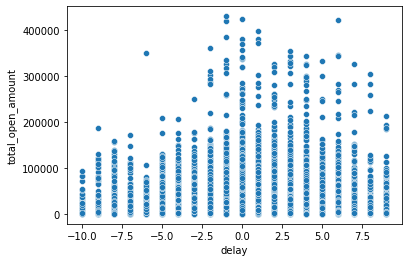

In [32]:
sns.scatterplot(data=main_train_x.merge(main_train_y,on = main_train_x.index), y="total_open_amount", x="delay")

## Feature engineering

In [33]:
main_train_x.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21865 entries, 1 to 23674
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       21865 non-null  object        
 1   name_customer       21865 non-null  object        
 2   clear_date          21865 non-null  datetime64[ns]
 3   buisness_year       21865 non-null  int64         
 4   posting_date        21865 non-null  datetime64[ns]
 5   due_in_date         21865 non-null  datetime64[ns]
 6   invoice_currency    21865 non-null  object        
 7   total_open_amount   21865 non-null  float64       
 8   cust_payment_terms  21865 non-null  object        
 9   posting_year        21865 non-null  int64         
 10  posting_month       21865 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 2.0+ MB


## Label encoding of required columns

#### business code label encode

In [34]:
business_code_encoder = LabelEncoder()
business_code_encoder.fit(main_train_x["business_code"])
main_train_x['business_code_enc'] = business_code_encoder.transform(main_train_x['business_code'])
val_x['business_code_enc'] = business_code_encoder.transform(val_x['business_code'])
testing_x['business_code_enc'] = business_code_encoder.transform(testing_x['business_code'])
business_code_encoder.classes_

array(['CA02', 'U001', 'U002', 'U005', 'U007', 'U013'], dtype=object)

<AxesSubplot:xlabel='business_code_enc', ylabel='delay'>

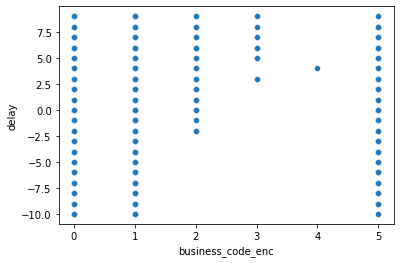

In [35]:
sns.scatterplot(data=main_train_x.merge(main_train_y,on = main_train_x.index), y="delay", x="business_code_enc")

## business code target encoding

In [36]:
bussiness_mean = main_train_x.merge(main_train_y , on = main_train_x.index ).groupby('business_code')['delay'].mean()
bussiness_mean 

business_code
CA02    2.943538
U001   -0.524922
U002    3.086207
U005    6.125000
U007    4.000000
U013    0.027027
Name: delay, dtype: float64

In [37]:
main_train_x['bus_code_target'] = main_train_x['business_code'].map(bussiness_mean)
val_x['bus_code_target'] = val_x['business_code'].map(bussiness_mean)
testing_x['bus_code_target'] = testing_x['business_code'].map(bussiness_mean)
main_train_x["bus_code_target"]

1       -0.524922
2       -0.524922
5       -0.524922
6       -0.524922
7       -0.524922
           ...   
23670   -0.524922
23671   -0.524922
23672   -0.524922
23673   -0.524922
23674   -0.524922
Name: bus_code_target, Length: 21865, dtype: float64

In [38]:
main_train_x.drop(columns="business_code",axis=1,inplace=True)
val_x.drop(columns="business_code",axis=1,inplace=True)
testing_x.drop(columns="business_code",axis=1,inplace=True)
main_train_x.drop(columns="business_code_enc",axis=1,inplace=True)
val_x.drop(columns="business_code_enc",axis=1,inplace=True)
testing_x.drop(columns="business_code_enc",axis=1,inplace=True)

#### invoice currency label encoding

In [39]:
invoice_curr_encoder = LabelEncoder()
invoice_curr_encoder.fit(main_train_x["invoice_currency"])
main_train_x['invoice_curr_enc'] = invoice_curr_encoder.transform(main_train_x['invoice_currency'])
val_x['invoice_curr_enc'] = invoice_curr_encoder.transform(val_x['invoice_currency'])
testing_x['invoice_curr_enc'] = invoice_curr_encoder.transform(testing_x['invoice_currency'])
invoice_curr_encoder.classes_

array(['CAD', 'USD'], dtype=object)

In [40]:
main_train_x.drop(columns="invoice_currency",axis=1,inplace=True)
val_x.drop(columns="invoice_currency",axis=1,inplace=True)
testing_x.drop(columns="invoice_currency",axis=1,inplace=True)

<AxesSubplot:xlabel='invoice_curr_enc', ylabel='delay'>

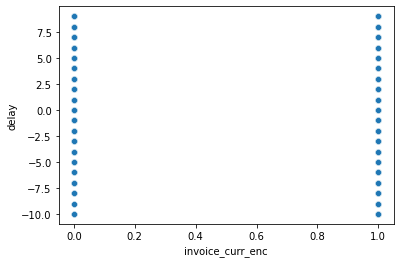

In [41]:
sns.scatterplot(data=main_train_x.merge(main_train_y,on = main_train_x.index), y="delay", x="invoice_curr_enc")

#### Customer payment terms label encoding

In [42]:
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(main_train_x["cust_payment_terms"])
main_train_x['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(main_train_x['cust_payment_terms'])
cust_payment_terms_encoder.classes_

array(['B052', 'B112', 'BR56', 'C106', 'CA10', 'CA30', 'CAB1', 'NA10',
       'NA25', 'NA31', 'NA32', 'NA38', 'NA3B', 'NA3F', 'NA84', 'NA9X',
       'NAA8', 'NAAW', 'NAAX', 'NAB1', 'NABG', 'NAC6', 'NACB', 'NAD1',
       'NAD4', 'NAD5', 'NAG2', 'NAGD', 'NAH4', 'NAM1', 'NAM2', 'NAM4',
       'NANC', 'NATH', 'NATJ', 'NATK', 'NAU5', 'NAUP', 'NAUZ', 'NAV9',
       'NAVC', 'NAVD', 'NAVE', 'NAVF', 'NAVL', 'NAVM', 'NAVQ', 'NAVR',
       'NAWM', 'NAWN', 'NAWP', 'NAX2'], dtype=object)

In [43]:
# for adding unseen variable
extra = set(val_x['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)
# adding them to the classess variable // 
for i in extra:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,i)
val_x['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(val_x['cust_payment_terms'])   

In [44]:
# for adding unseen variable
extra = set(testing_x['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)
# adding them to the classess variable // 
for i in extra:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,i)
testing_x['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(testing_x['cust_payment_terms'])

In [45]:
main_train_x.drop(columns="cust_payment_terms",axis=1,inplace=True)
val_x.drop(columns="cust_payment_terms",axis=1,inplace=True)
testing_x.drop(columns="cust_payment_terms",axis=1,inplace=True)

<AxesSubplot:xlabel='cust_payment_terms_enc', ylabel='delay'>

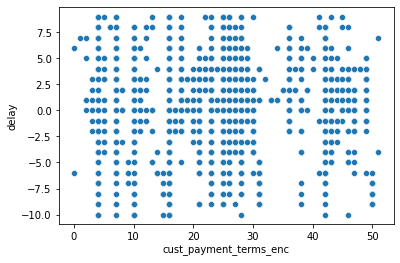

In [46]:
sns.scatterplot(data=main_train_x.merge(main_train_y,on = main_train_x.index), y="delay", x="cust_payment_terms_enc")

#### Customer Name Target  encoding

In [47]:
customer_means = main_train_x.merge(main_train_y , on = main_train_x.index ).groupby('name_customer')['delay'].mean()
customer_means_val = val_x.merge(val_y , on = val_x.index ).groupby('name_customer')['delay'].mean()
customer_means_test = testing_x.merge(testing_y , on = testing_x.index ).groupby('name_customer')['delay'].mean()
mean = dict(customer_means)
mean_val = dict(customer_means_val)
mean_test = dict(customer_means_test)
# print(d.keys(),len(d))
for values,key in mean_val.items():
    if values not in mean.keys():
        mean[values]=key
for values,key in mean_test.items():        
    if values not in mean.keys():
        mean[values]=key
# print(d.keys(),len(d))        

In [48]:
main_train_x['name_customer'] = main_train_x['name_customer'].map(mean)
val_x['name_customer'] = val_x['name_customer'].map(mean)
testing_x['name_customer'] = testing_x['name_customer'].map(mean)
main_train_x["name_customer"]

1        0.760870
2        0.227848
5        0.542857
6        1.000000
7        0.538462
           ...   
23670    0.375000
23671   -2.669510
23672    0.702703
23673   -0.133333
23674   -2.601547
Name: name_customer, Length: 21865, dtype: float64

<AxesSubplot:xlabel='name_customer', ylabel='delay'>

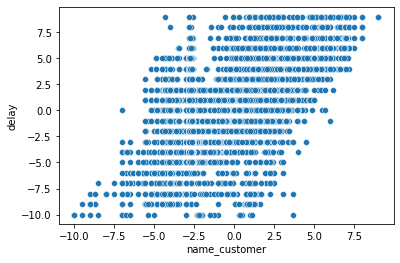

In [49]:
sns.scatterplot(data=main_train_x.merge(main_train_y,on = main_train_x.index), y="delay", x="name_customer")

### Breaking due in date to day 

In [50]:
main_train_x['due_in_day'] = main_train_x['due_in_date'].dt.day


val_x['due_in_day'] = val_x['due_in_date'].dt.day

testing_x['due_in_day'] = testing_x['due_in_date'].dt.day

In [51]:
main_train_x.drop(columns="due_in_date",axis=1,inplace=True)
val_x.drop(columns="due_in_date",axis=1,inplace=True)
testing_x.drop(columns="due_in_date",axis=1,inplace=True)


### Droping unwanted columns

In [52]:
main_train_x.drop(columns="clear_date",axis=1,inplace=True)
val_x.drop(columns="clear_date",axis=1,inplace=True)
testing_x.drop(columns="clear_date",axis=1,inplace=True)

main_train_x.drop(columns="posting_date",axis=1,inplace=True)
val_x.drop(columns="posting_date",axis=1,inplace=True)
testing_x.drop(columns="posting_date",axis=1,inplace=True)

main_train_x.drop(columns="posting_year",axis=1,inplace=True)
val_x.drop(columns="posting_year",axis=1,inplace=True)
testing_x.drop(columns="posting_year",axis=1,inplace=True)

main_train_x.drop(columns="posting_month",axis=1,inplace=True)
val_x.drop(columns="posting_month",axis=1,inplace=True)
testing_x.drop(columns="posting_month",axis=1,inplace=True)

In [53]:
print(main_train_x.nunique())
print("##"*50)
print(val_x.nunique())
print("##"*50)
print(testing_x.nunique())
print("##"*50)

name_customer               452
buisness_year                 1
total_open_amount         20106
bus_code_target               6
invoice_curr_enc              2
cust_payment_terms_enc       52
due_in_day                   31
dtype: int64
####################################################################################################
name_customer              498
buisness_year                1
total_open_amount         8100
bus_code_target              4
invoice_curr_enc             2
cust_payment_terms_enc      49
due_in_day                  31
dtype: int64
####################################################################################################
name_customer              492
buisness_year                2
total_open_amount         6357
bus_code_target              5
invoice_curr_enc             2
cust_payment_terms_enc      47
due_in_day                  31
dtype: int64
####################################################################################################


In [54]:
main_train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21865 entries, 1 to 23674
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name_customer           21865 non-null  float64
 1   buisness_year           21865 non-null  int64  
 2   total_open_amount       21865 non-null  float64
 3   bus_code_target         21865 non-null  float64
 4   invoice_curr_enc        21865 non-null  int32  
 5   cust_payment_terms_enc  21865 non-null  int32  
 6   due_in_day              21865 non-null  int64  
dtypes: float64(3), int32(2), int64(2)
memory usage: 1.2 MB


## Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

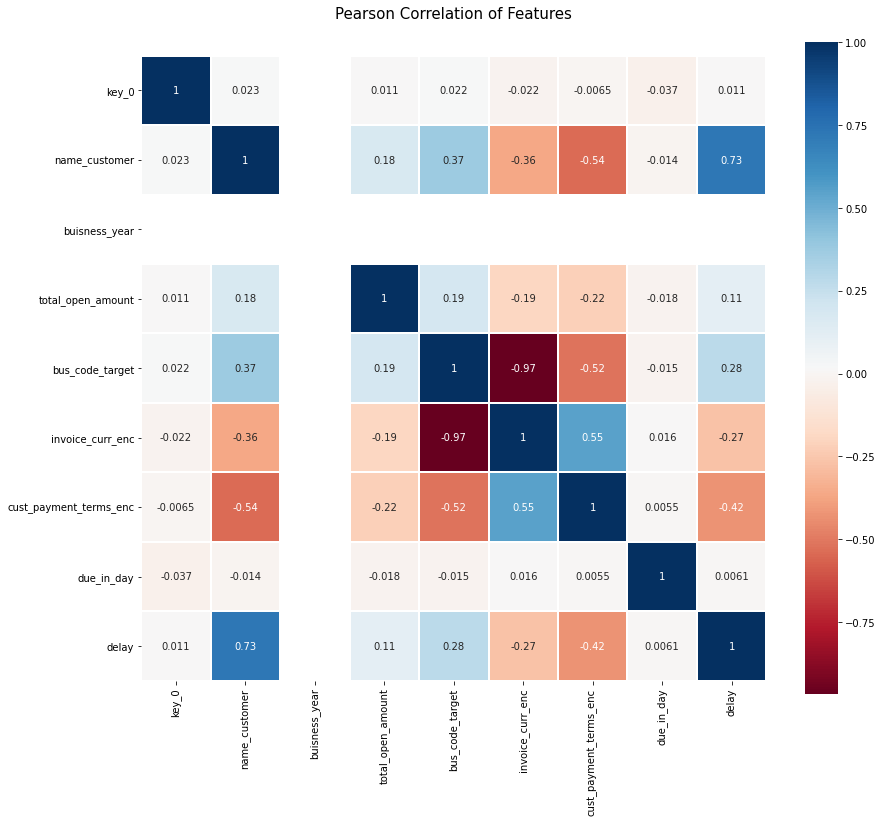

In [55]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(main_train_x.merge(main_train_y , on = main_train_x.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [56]:
main_train_x.drop(columns="buisness_year",axis=1,inplace=True)
val_x.drop(columns="buisness_year",axis=1,inplace=True)
testing_x.drop(columns="buisness_year",axis=1,inplace=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

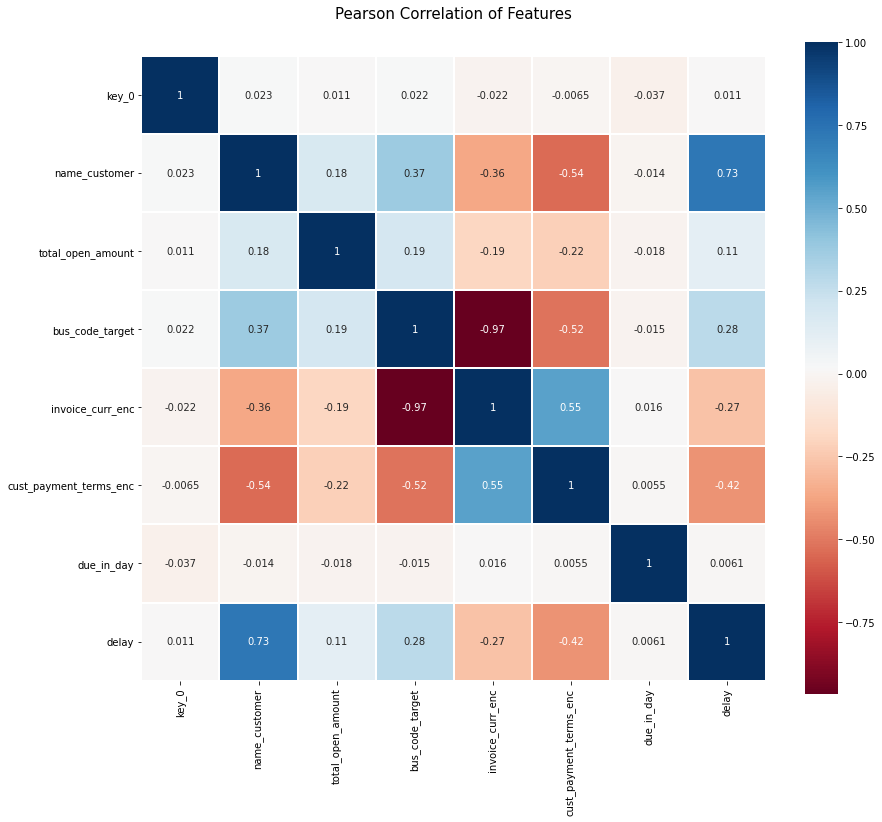

In [57]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(main_train_x.merge(main_train_y , on = main_train_x.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [58]:
from sklearn.feature_selection import VarianceThreshold
factor = VarianceThreshold(0.8)
factor.fit(main_train_x)

VarianceThreshold(threshold=0.8)

In [59]:
factor.variances_

array([5.63141720e+00, 1.57189081e+09, 8.58558435e-01, 6.75872113e-02,
       7.07536845e+01, 7.72779439e+01])

## Modelling 

## Linear Regression

In [60]:
base_model = LinearRegression()
base_model.fit(main_train_x, main_train_y)

LinearRegression()

In [61]:
val_y_predict = base_model.predict(val_x)

In [62]:
# mean_squared_error(val_y, val_y_predict, squared=False)
mse=mean_squared_error(val_y,val_y_predict, squared=False)
print(mse)
rmse=math.sqrt(mse)
print(rmse)

5.884044513833513
2.4257049519332545


In [63]:
r2_score(val_y, val_y_predict)

0.5412662300186586

## Decision Tree

In [64]:
regressor = DecisionTreeRegressor(
    criterion='mse',
    splitter='best',
    max_depth=4,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    ccp_alpha=0.0,
)

In [65]:
regressor.fit(main_train_x, main_train_y)

DecisionTreeRegressor(max_depth=4)

In [66]:
y_predict2 = regressor.predict(val_x)

In [67]:
mse=mean_squared_error(val_y,y_predict2, squared=False)
print(mse)
rmse=math.sqrt(mse)
print(rmse)

7.601050516456469
2.757000275019295


In [68]:
r2_score(val_y, y_predict2)

0.23448086520884381

## SVR 

In [69]:
SVRregressor = SVR(kernel='rbf')
SVRregressor.fit(main_train_x,main_train_y)

SVR()

In [70]:
y_val_svr = SVRregressor.predict(val_x) 

In [71]:
mse=mean_squared_error(val_y,y_val_svr, squared=False)
print(mse)
rmse=math.sqrt(mse)
print(rmse)

8.711952627767111
2.9516017054757087


In [72]:
r2_score(val_y, y_val_svr)

-0.005633711148154363

#### Boosting

In [73]:
model = XGBRegressor(n_estimators=10, max_depth=10, learning_rate=0.001)
model.fit(main_train_x, main_train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.001, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [74]:
y_predict_boost = model.predict(val_x)

In [75]:
mse=mean_squared_error(val_y,y_predict_boost, squared=False)
print(mse)
rmse=math.sqrt(mse)
print(rmse)

8.674588731864155
2.9452654773151017


In [76]:
r2_score(val_y, y_predict_boost)

0.0029737320312099857

##  After seeing the r2 score of every model Linear regression model can be considered for further testing 

#### For predicting payment date in  major test set with all null values in clear date, we need to preprocess the test data set 

In [77]:
main_train_x.columns

Index(['name_customer', 'total_open_amount', 'bus_code_target',
       'invoice_curr_enc', 'cust_payment_terms_enc', 'due_in_day'],
      dtype='object')

In [78]:
test.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           10000 non-null  object 
 1   cust_number             10000 non-null  object 
 2   name_customer           10000 non-null  object 
 3   clear_date              0 non-null      object 
 4   buisness_year           10000 non-null  float64
 5   doc_id                  10000 non-null  float64
 6   posting_date            10000 non-null  object 
 7   document_create_date    10000 non-null  int64  
 8   document_create_date.1  10000 non-null  int64  
 9   due_in_date             10000 non-null  float64
 10  invoice_currency        10000 non-null  object 
 11  document type           10000 non-null  object 
 12  posting_id              10000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       10000 non-null 

In [80]:
invoice_curr_encoder.classes_,cust_payment_terms_encoder.classes_,bussiness_mean

(array(['CAD', 'USD'], dtype=object),
 array(['B052', 'B112', 'BR56', 'C106', 'CA10', 'CA30', 'CAB1', 'NA10',
        'NA25', 'NA31', 'NA32', 'NA38', 'NA3B', 'NA3F', 'NA84', 'NA9X',
        'NAA8', 'NAAW', 'NAAX', 'NAB1', 'NABG', 'NAC6', 'NACB', 'NAD1',
        'NAD4', 'NAD5', 'NAG2', 'NAGD', 'NAH4', 'NAM1', 'NAM2', 'NAM4',
        'NANC', 'NATH', 'NATJ', 'NATK', 'NAU5', 'NAUP', 'NAUZ', 'NAV9',
        'NAVC', 'NAVD', 'NAVE', 'NAVF', 'NAVL', 'NAVM', 'NAVQ', 'NAVR',
        'NAWM', 'NAWN', 'NAWP', 'NAX2', 'NAWU', 'NATX', 'BR12', 'NAUW',
        'NATW', '90M7', 'NAM3', 'NATV', 'NAUN', 'NACE', 'NATZ', 'NA8Q'],
       dtype=object),
 business_code
 CA02    2.943538
 U001   -0.524922
 U002    3.086207
 U005    6.125000
 U007    4.000000
 U013    0.027027
 Name: delay, dtype: float64)

In [81]:
test['bus_code_target'] = test['business_code'].map(bussiness_mean)
test['name_customer'] = test['name_customer'].map(mean)
# for adding unseen variable
extra = set(test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)
# adding them to the classess variable // 
for i in extra:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,i)
test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(test['cust_payment_terms'])
test['invoice_curr_enc'] = invoice_curr_encoder.transform(test['invoice_currency'])
test["due_in_date"]= pd.to_datetime(test["due_in_date"],format='%Y%m%d')
test['due_in_day'] = test['due_in_date'].dt.day
test_due_in_date = test["due_in_date"]
## deleting unwanted columns
test.drop(['business_code', 'cust_number', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],axis=1,inplace = True)

In [82]:
test["name_customer"].fillna(test["name_customer"].mean(),inplace=True)

In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name_customer           10000 non-null  float64
 1   total_open_amount       10000 non-null  float64
 2   bus_code_target         10000 non-null  float64
 3   cust_payment_terms_enc  10000 non-null  int32  
 4   invoice_curr_enc        10000 non-null  int32  
 5   due_in_day              10000 non-null  int64  
dtypes: float64(3), int32(2), int64(1)
memory usage: 390.8 KB


In [84]:
test_delay_predict = base_model.predict(test)

In [85]:
test_delay_predict

array([11.07915447,  7.83347712,  8.91188867, ..., 11.23072473,
        8.54766793,  8.96176104])

In [86]:
test_delay_predict = pd.to_timedelta(test_delay_predict, unit="D")

In [87]:
test["delay"] = test_delay_predict
test["due_in_date"] = test_due_in_date
test["predict_payment_date"] = test["due_in_date"] + test["delay"]
test["predict_payment_date"] = pd.to_datetime(test["predict_payment_date"],format="%Y%m%d" )
test

,name_customer,total_open_amount,bus_code_target,cust_payment_terms_enc,invoice_curr_enc,due_in_day,delay,due_in_date,predict_payment_date
0,-2.802632,2851.12,-0.524922,28,1,24,11 days 01:53:58.946035200,2020-05-24,2020-06-04 01:53:58.946035200
1,0.000000,13529.55,-0.524922,16,1,17,7 days 20:00:12.423254400,2020-04-17,2020-04-24 20:00:12.423254400
2,1.083333,6995.52,-0.524922,16,1,20,8 days 21:53:07.181433600,2020-05-20,2020-05-28 21:53:07.181433600
3,0.046154,115796.68,-0.524922,21,1,22,10 days 03:34:32.753452799,2020-05-22,2020-06-01 03:34:32.753452799
4,0.923077,57674.61,-0.524922,16,1,8,8 days 13:55:17.951145600,2020-04-08,2020-04-16 13:55:17.951145600
...,...,...,...,...,...,...,...,...,...
9995,-0.017019,32164.52,-0.524922,16,1,15,7 days 18:23:28.883068800,2020-05-15,2020-05-22 18:23:28.883068800
9996,-2.645951,29444.13,-0.524922,28,1,20,11 days 03:37:59.120889600,2020-05-20,2020-05-31 03:37:59.120889600
9997,-2.621569,2677.34,-0.524922,28,1,20,11 days 05:32:14.616931200,2020-04-20,2020-05-01 05:32:14.616931200
9998,0.666667,14211.84,-0.524922,16,1,29,8 days 13:08:38.509411200,2020-03-29,2020-04-06 13:08:38.509411200


In [88]:
test.to_csv("Test_Results.csv")